векторный потенциал вращающейся твердой сферы

$\vec A = \int \frac{\rho\,\vec v}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}dV$

я воспользовался разложением обратного радиус вектора по сферическим гармоникам

Поскольку расстояние между координатами заряда и точки наблюдения ${{R}_{0}}=\left|\overrightarrow{r_{q}} - \overrightarrow{r_{a}}\right|$ находится в знаменателе, то в сферической системе координат можно применить разложение по сферическим гармоникам следующего вида [1] если $\left( {{r}_{q}}<{{r}_{a}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{a}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{q}}}{{{r}_{a}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

и если $\left( {{r}_{a}}<{{r}_{q}} \right)$ то

$\frac{1}{\left| \overrightarrow{{{r}_{q}}}-\overrightarrow{{{r}_{a}}} \right|}=\frac{1}{{{r}_{q}}}\sum\limits_{l=0}^{\infty }{{{\left( \frac{{{r}_{a}}}{{{r}_{q}}} \right)}^{l}}{{P}_{l}} \cos \left( \gamma  \right)}$

В данной формуле ${{P}_{l}} \cos \left( \gamma  \right)$ это полиномы Лежандра аргумент которых $\gamma$ есть угол между векторами ${{r}_{q}}$  и ${{r}_{a}}$. Применяя формулу, известную как теорему сложения

${{P}_{l}}\cos \left( \gamma  \right)=\frac{4\pi }{2l+1}\sum\limits_{m=-l}^{l}{Y_{l,m}^{*}\left( {{\theta }_{a}},{{\varphi }_{a}} \right)}\ {{Y}_{l,m}}\left( {{\theta }_{q}},{{\varphi }_{q}} \right)$

получаем способ аналитического вычисления интеграла

1. З.Флюгге Задачи по квантовой механике т.2 М. "Мир" 1974. стр. 296, 300

In [1]:
def legendre_summ(l, theta_q, phi_q, theta_a, phi_a):
    from sage.functions.special import spherical_harmonic
    m = var("m")
    f = lambda l, m, theta_q, phi_q, theta_a, phi_a : spherical_harmonic(l, m, theta_q, phi_q) * conjugate(spherical_harmonic(l, m, theta_a, phi_a))
    return 4 * pi / (2*l + 1) * sum(f(l, m, theta_q, phi_q, theta_a, phi_a), m, -l, l)

In [2]:
def legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l, bInner):
    forget()
    theta_q, phi_q = var('theta_q, phi_q')
    assume(theta_q, 'real')
    assume(phi_q, 'real')

    theta_a, phi_a = var('theta_a, phi_a')
    assume(theta_a, 'real')
    assume(phi_a, 'real')

    phi_a = 0

    r_a = var("r_a")
    r_q = var("r_q")
    omega = var("omega")
    R = var("R")
    v = omega*r_q*sin(theta_q)
    rho = var("rho")

    assume(r_a, 'real')
    assume(r_q, 'real')
    assume(R, 'real')
    assume(r_q>0)
    assume(r_a>0)
    if True == bInner:
        #assume(R>0)
        assume(r_a<R)
        # if r_q < r_a
        A1 = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q-phi_a)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, r_a)
        # if r_a < r_q
        A2 = ((1/r_q)*((r_a/r_q)^l)*rho*v*cos(phi_q-phi_a)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, r_a, R)
        A = A1 + A2
    else:
        assume(r_a>R)
        #assume(R>0)
        # if r_q < r_a
        A = ((1/r_a)*((r_q/r_a)^l)*rho*v*cos(phi_q-phi_a)*sin(theta_q)*(r_q^2)*legendre_summ(l, theta_q, phi_q, theta_a, phi_a)).integrate(theta_q, 0, pi).integrate(phi_q, 0, 2*pi).integrate(r_q, 0, R)
       
    return A

In [3]:
def calc_A_solid(bInner):
    A_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(0, bInner = bInner)
    print ("A_solid = ", A_solid)
    l_max = 5
    for l in range(1, l_max+1):
        print ("l = ", l)
        dA_solid = legendre_summ_of_vector_potencial_of_rotated_solid_sphere(l, bInner = bInner)
        print ("dA_solid = ", dA_solid)
        A_solid += dA_solid
        
    print ("A_solid = ", A_solid)
    
    #V = 4/3*pi*R^3
    #q = rho*V
    A_solid = (A_solid * var('q')/(rho*4/3*pi*R^3)).full_simplify()
    
    print ("A_solid = ", A_solid)
    return A_solid

In [4]:
A_solid_Inner = calc_A_solid(bInner=True)
A_solid_Outer = calc_A_solid(bInner=False)

A_solid =  0
l =  1
dA_solid =  4/15*pi*omega*r_a^3*rho*sin(theta_a) + 2/3*pi*(R^2 - r_a^2)*omega*r_a*rho*sin(theta_a)
l =  2
dA_solid =  0
l =  3
dA_solid =  0
l =  4
dA_solid =  0
l =  5
dA_solid =  0
A_solid =  4/15*pi*omega*r_a^3*rho*sin(theta_a) + 2/3*pi*(R^2 - r_a^2)*omega*r_a*rho*sin(theta_a)
A_solid =  1/10*(5*R^2*omega*q*r_a - 3*omega*q*r_a^3)*sin(theta_a)/R^3
A_solid =  0
l =  1
dA_solid =  4/15*pi*R^5*omega*rho*sin(theta_a)/r_a^2
l =  2
dA_solid =  0
l =  3
dA_solid =  0
l =  4
dA_solid =  0
l =  5
dA_solid =  0
A_solid =  4/15*pi*R^5*omega*rho*sin(theta_a)/r_a^2
A_solid =  1/5*R^2*omega*q*sin(theta_a)/r_a^2


In [5]:
from IPython.display import display, Math, Latex
display(Math(latex(A_solid_Inner.expand())))

<IPython.core.display.Math object>

In [6]:
display(Math(latex(A_solid_Outer)))

<IPython.core.display.Math object>

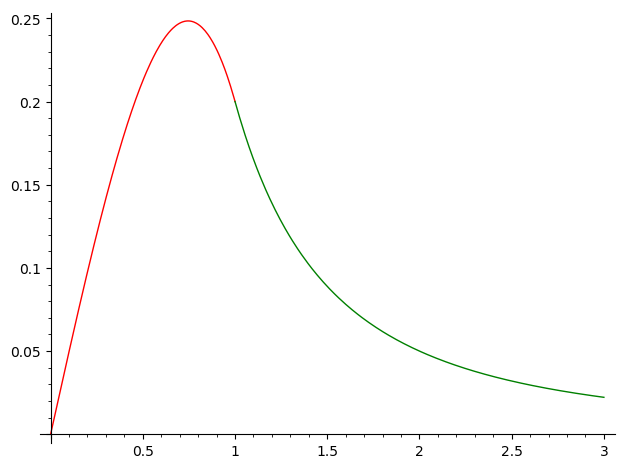

In [7]:
plt  = plot(A_solid_Inner.subs(q == 1, omega == 1, R == 1, theta_a == pi/2), (r_a, 0, 1), color='red') 
plt += plot(A_solid_Outer.subs(q == 1, omega == 1, R == 1, theta_a == pi/2), (r_a, 1, 3), color='green')
plt.show()

In [8]:
ES.<r,th,ph> = EuclideanSpace(coordinates='spherical')

F = ES.vector_field(
    function('F_r')(r,th,ph),
    function('F_theta')(r,th,ph),
    function('F_varphi')(r,th,ph),
    name='F')

from sage.manifolds.operators import *

rot_F = curl(F)

In [9]:
display(Math(latex(rot_F[1].expr())))
display(Math(latex(rot_F[2].expr())))
display(Math(latex(rot_F[3].expr())))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
A_in = ES.vector_field(
    0,
    0,
    A_solid_Inner.subs(q == 1, omega == 1, R == 1, r_a == r, theta_a == th),
    name='A_in')

In [11]:
A_out = ES.vector_field(
    0,
    0,
    A_solid_Outer.subs(q == 1, omega == 1, R == 1, r_a == r, theta_a == th),
    name='A_out')

In [12]:
rot_A_in  = curl(A_in)
rot_A_out = curl(A_out)

In [13]:
A_out_r     = A_out[1].expr()
A_out_theta = A_out[2].expr()
A_out_phi   = A_out[3].expr()

In [14]:
H_in_r     = rot_A_in[1].expr()
H_in_theta = rot_A_in[2].expr()
H_in_phi   = 0

In [15]:
H_out_r     = rot_A_out[1].expr()
H_out_theta = rot_A_out[2].expr()
H_out_phi   = 0

In [16]:
H_in_r

-1/5*(3*r^2 - 5)*cos(th)

In [17]:
# change vector_field from sperical to cartesian

In [18]:
H_in_xy = H_in_r * sin(th) + H_in_theta * cos(th)
H_in_z  = H_in_r * cos(th) - H_in_theta * sin(th)
H_in_x  = H_in_xy * cos(ph)
H_in_y  = H_in_xy * sin(ph)

In [19]:
H_out_xy = H_out_r * sin(th) + H_out_theta * cos(th)
H_out_z  = H_out_r * cos(th) - H_out_theta * sin(th)
H_out_x  = H_out_xy * cos(ph)
H_out_y  = H_out_xy * sin(ph)

In [20]:
A_out_xy = A_out_r * sin(th) + A_out_theta * cos(th)
A_out_z  = A_out_r * cos(th) - A_out_theta * sin(th)
A_out_x  = A_out_xy * cos(ph) - A_out_phi * sin(ph)
A_out_y  = A_out_xy * sin(ph) + A_out_phi * cos(ph)

In [21]:
H_in_x

1/5*((6*r^2 - 5)*cos(th)*sin(th) - (3*r^2 - 5)*cos(th)*sin(th))*cos(ph)

In [22]:
print(A_out[3])

1/5*sin(th)/r^2


In [23]:
print(curl(A_in)[1])
print(curl(A_in)[2])
print(curl(A_in)[3])

-1/5*(3*r^2 - 5)*cos(th)
1/5*(6*r^2 - 5)*sin(th)
0


In [24]:
print(curl(A_out)[1])
print(curl(A_out)[2])
print(curl(A_out)[3])

2/5*cos(th)/r^3
1/5*sin(th)/r^3
0


In [25]:
print(div(curl(A_in)).expr())
print(div(curl(A_out)).expr())

0
0


In [26]:
E3.<x,y,z> = EuclideanSpace(3)
cartesian = E3.cartesian_coordinates()
spherical.<r,th,ph> = E3.spherical_coordinates()
sp_R, sp_Th, sp_Ph = E3.coord_change(cartesian, spherical)(x,y,z)
cart_X, cart_Y, cart_Z = E3.coord_change(spherical,cartesian)(r,th,ph)
print(sp_R, sp_Th, sp_Ph)
print(cart_X, cart_Y, cart_Z)


H_in_x_ = H_in_x.subs({r: sp_R, th: sp_Th, ph: sp_Ph})
H_in_y_ = H_in_y.subs({r: sp_R, th: sp_Th, ph: sp_Ph})
H_in_z_ = H_in_z.subs({r: sp_R, th: sp_Th, ph: sp_Ph})


H_out_x_ = H_out_x.subs({r: sp_R, th: sp_Th, ph: sp_Ph})
H_out_y_ = H_out_y.subs({r: sp_R, th: sp_Th, ph: sp_Ph})
H_out_z_ = H_out_z.subs({r: sp_R, th: sp_Th, ph: sp_Ph})


A_out_x_ = A_out_x.subs({r: sp_R, th: sp_Th, ph: sp_Ph})
A_out_y_ = A_out_y.subs({r: sp_R, th: sp_Th, ph: sp_Ph})
A_out_z_ = A_out_z.subs({r: sp_R, th: sp_Th, ph: sp_Ph})

print(H_in_x_)
print(H_in_y_)
print(H_in_z_)


print(H_out_x_)
print(H_out_y_)
print(H_out_z_)

print(A_out_x_)
print(A_out_y_)
print(A_out_z_)

sqrt(x^2 + y^2 + z^2) arctan2(sqrt(x^2 + y^2), z) arctan2(y, x)
r*cos(ph)*sin(th) r*sin(ph)*sin(th) r*cos(th)
1/5*((6*x^2 + 6*y^2 + 6*z^2 - 5)*sqrt(x^2 + y^2)*z/(x^2 + y^2 + z^2) - (3*x^2 + 3*y^2 + 3*z^2 - 5)*sqrt(x^2 + y^2)*z/(x^2 + y^2 + z^2))*x/sqrt(x^2 + y^2)
1/5*((6*x^2 + 6*y^2 + 6*z^2 - 5)*sqrt(x^2 + y^2)*z/(x^2 + y^2 + z^2) - (3*x^2 + 3*y^2 + 3*z^2 - 5)*sqrt(x^2 + y^2)*z/(x^2 + y^2 + z^2))*y/sqrt(x^2 + y^2)
-1/5*(3*x^2 + 3*y^2 + 3*z^2 - 5)*z^2/(x^2 + y^2 + z^2) - 1/5*(6*x^2 + 6*y^2 + 6*z^2 - 5)*(x^2 + y^2)/(x^2 + y^2 + z^2)
3/5*x*z/(x^2 + y^2 + z^2)^(5/2)
3/5*y*z/(x^2 + y^2 + z^2)^(5/2)
2/5*z^2/(x^2 + y^2 + z^2)^(5/2) - 1/5*(x^2 + y^2)/(x^2 + y^2 + z^2)^(5/2)
-1/5*y/(x^2 + y^2 + z^2)^(3/2)
1/5*x/(x^2 + y^2 + z^2)^(3/2)
0


In [27]:
ES_cartesian.<x,y,z> = EuclideanSpace(coordinates='Cartesian')
H_in = ES_cartesian.vector_field(
    H_in_x_,
    H_in_y_,
    H_in_z_,
    name='H_in')
H_out = ES_cartesian.vector_field(
    H_out_x_,
    H_out_y_,
    H_out_z_,
    name='H_out')

A_out = ES_cartesian.vector_field(
    A_out_x_,
    A_out_y_,
    A_out_z_,
    name='A_out')

In [28]:
H_in.plot(ranges={x: (0.1, 1), y:(-1,1), z:(-1,1)}, scale=0.2, width=2)

Graphics3d Object

In [29]:
H_out.plot(ranges={x: (1, 2), y:(-2,2), z:(-2,2)}, scale=3, width=2)

Graphics3d Object

In [30]:
A_out.plot(ranges={x: (1, 2), y:(-2,2), z:(-2,2)}, scale=3, width=2)

Graphics3d Object

In [31]:
#rot_A_in.plot(ranges={r: (0.1, 1)}, scale=0.2, width=2)

In [32]:
#rot_A_out.plot(ranges={r: (1, 2)}, scale=2, width=2)

In [33]:
#rot_A_in.plot(chart=cartesian, chart_domain=spherical, ranges={r: (2, 10)}, scale=0.2, width=2)

Теперь представляет интерес двумерная визуализация магнитного поля (ротора $A$)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xa_linspace = np.linspace(-2, +2, 20)
za_linspace = np.linspace(-2, +2, 20)

xa_list = xa_linspace.tolist()
za_list = za_linspace.tolist()

xa_grid,za_grid = np.meshgrid(xa_linspace, za_linspace)

u = xa_grid * np.nan # h_x
v = za_grid * np.nan # h_z

Ya = 0
for ix in np.arange(0, len(xa_linspace), 1):
    for iz in np.arange(0, len(za_linspace), 1):
        Xa = xa_list[ix]
        Za = za_list[iz]
        Ra = sqrt(Xa*Xa + Za*Za + Ya*Ya)
        theta_a = acos(Za/Ra)
        phi_a = atan(Ya/Xa)
        if Xa > 0:
            phi_a = 0
        else:
            phi_a = pi
        
        if Ra < 1:
            h_r     = rot_A_in[1].expr().subs(r == Ra, th == theta_a)
            h_theta = rot_A_in[2].expr().subs(r == Ra, th == theta_a)
        else:
            h_r     = rot_A_out[1].expr().subs(r == Ra, th == theta_a)
            h_theta = rot_A_out[2].expr().subs(r == Ra, th == theta_a)
            
        # h_x
        u[iz][ix] = h_r * sin(theta_a) + h_theta * cos(theta_a)
        if Xa < 0:
            u[iz][ix] *= -1
        
        # h_z
        v[iz][ix] = h_r * cos(theta_a) - h_theta * sin(theta_a)

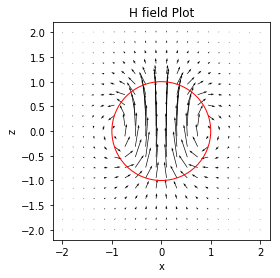

In [35]:
fig,ax=plt.subplots(1,1)
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
ax.quiver(xa_grid,za_grid,u,v)
ax.set_title('H field Plot')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.add_patch(circle1)
ax.set_aspect(aspect='equal')
plt.show()

In [36]:
u_norm = u
v_norm = v

for ix in np.arange(0, len(xa_linspace), 1):
    for iz in np.arange(0, len(za_linspace), 1):
        n = sqrt(u[iz][ix]^2 + v[iz][ix]^2)
        u_norm[iz][ix] = u[iz][ix] / n
        v_norm[iz][ix] = v[iz][ix] / n

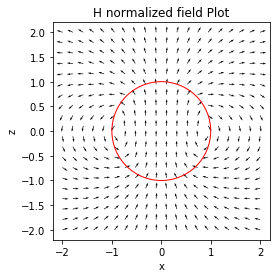

In [37]:
fig,ax=plt.subplots(1,1)
circle1 = plt.Circle((0, 0), 1, color='r', fill=False)
ax.quiver(xa_grid,za_grid,u_norm,v_norm)
ax.set_title('H normalized field Plot')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.add_patch(circle1)
ax.set_aspect(aspect='equal')
plt.show()

In [38]:
# the second rotated sphere

In [39]:
x_a, y_a, z_a = var("x_a, y_a, z_a")

In [40]:
A_out_x_a = A_out_x_.subs({x: x - x_a, y: y-y_a, z: z - z_a})
A_out_y_a = A_out_y_.subs({x: x - x_a, y: y-y_a, z: z - z_a})
A_out_z_a = A_out_z_.subs({x: x - x_a, y: y-y_a, z: z - z_a})

In [41]:
A_out_x_a

-1/5*(y - y_a)/((x - x_a)^2 + (y - y_a)^2 + (z - z_a)^2)^(3/2)

In [42]:
A_out_y_a

1/5*(x - x_a)/((x - x_a)^2 + (y - y_a)^2 + (z - z_a)^2)^(3/2)

In [43]:
A_out_z_a

0

In [44]:
A_out_a = E3.vector_field(
    A_out_x_a,
    A_out_y_a,
    A_out_z_a,
    name='A_out_a')

In [45]:
A_out_a[:]

[-1/5*(y - y_a)/((x - x_a)^2 + (y - y_a)^2 + (z - z_a)^2)^(3/2),
 1/5*(x - x_a)/((x - x_a)^2 + (y - y_a)^2 + (z - z_a)^2)^(3/2),
 0]

In [46]:
A_out_a.display()

A_out_a = -1/5*(y - y_a)/((x - x_a)^2 + (y - y_a)^2 + (z - z_a)^2)^(3/2) e_x + 1/5*(x - x_a)/((x - x_a)^2 + (y - y_a)^2 + (z - z_a)^2)^(3/2) e_y

In [47]:
# https://doc.sagemath.org/html/en/thematic_tutorials/vector_calculus/vector_calc_change.html
A_out_a.display(E3.spherical_frame())

A_out_a = -1/5*sqrt(x^2 - 2*x*x_a + x_a^2 + y^2 - 2*y*y_a + y_a^2 + z^2 - 2*z*z_a + z_a^2)*sqrt(x^2 + y^2 + z^2)*(x_a*y - x*y_a)/(x^6 - 4*x^5*x_a + 6*x^4*x_a^2 - 4*x^3*x_a^3 + x^2*x_a^4 + y^6 + z^6 + (3*x^2 - 4*x*x_a + 2*x_a^2)*y^4 + (x^2 + y^2)*y_a^4 + (3*x^2 - 4*x*x_a + 2*x_a^2 + 3*y^2 - 4*y*y_a + 2*y_a^2)*z^4 + (x^2 + y^2 + z^2)*z_a^4 - 4*(x^2*y + y^3)*y_a^3 - 4*(z^3 + (x^2 + y^2)*z)*z_a^3 + (3*x^4 - 8*x^3*x_a + 8*x^2*x_a^2 - 4*x*x_a^3 + x_a^4)*y^2 + 2*(x^4 - 2*x^3*x_a + x^2*x_a^2 + 3*y^4 + (4*x^2 - 2*x*x_a + x_a^2)*y^2)*y_a^2 + (3*x^4 - 8*x^3*x_a + 8*x^2*x_a^2 - 4*x*x_a^3 + x_a^4 + 3*y^4 - 4*y*y_a^3 + y_a^4 + 2*(3*x^2 - 4*x*x_a + 2*x_a^2)*y^2 + 2*(2*x^2 - 2*x*x_a + x_a^2 + 4*y^2)*y_a^2 - 4*(2*y^3 + (2*x^2 - 2*x*x_a + x_a^2)*y)*y_a)*z^2 + 2*(x^4 - 2*x^3*x_a + x^2*x_a^2 + y^4 + 3*z^4 + (2*x^2 - 2*x*x_a + x_a^2)*y^2 + (x^2 + y^2)*y_a^2 + (4*x^2 - 2*x*x_a + x_a^2 + 4*y^2 - 2*y*y_a + y_a^2)*z^2 - 2*(x^2*y + y^3)*y_a)*z_a^2 - 4*(y^5 + (2*x^2 - 2*x*x_a + x_a^2)*y^3 + (x^4 - 2*x^3*x_a + x^

In [48]:
# https://doc.sagemath.org/html/en/thematic_tutorials/vector_calculus/vector_calc_change.html
A_out_a_str = str(A_out_a.display(E3.spherical_frame(), E3.spherical_coordinates()))
A_out_a_str

'A_out_a = -1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*sin(th) - x_a*sin(ph)*sin(th))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 + 2*(2*(sin(ph)^2 - 1)*r^2*sin(th)^2 - r^2)*x_a^2 - 2*(2*r^2*sin(ph)^2*sin(th)^2 - 2*r*x_a*cos(ph)*sin(th) + r^2 + x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a) e_r - 1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*cos(th) - x_a*cos(th)*sin(ph))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4

In [62]:
#Sage 9.2
# A_out_a.set_default_chart(spherical)
# E.set_default_frame(spherical_frame)

In [49]:
A_out_a_str.find("=")

8

In [50]:
A_out_a_str.find("e_r")

754

In [51]:
A_out_a_str.find("e_th")

1503

In [52]:
A_out_a_str.find("e_ph")

2249

In [53]:
A_out_a_str_r = A_out_a_str[A_out_a_str.find("=")+1:A_out_a_str.find("e_r")]
A_out_a_str_r

' -1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*sin(th) - x_a*sin(ph)*sin(th))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 + 2*(2*(sin(ph)^2 - 1)*r^2*sin(th)^2 - r^2)*x_a^2 - 2*(2*r^2*sin(ph)^2*sin(th)^2 - 2*r*x_a*cos(ph)*sin(th) + r^2 + x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a) '

In [54]:
A_out_a_str_th = A_out_a_str[A_out_a_str.find("e_r")+3:A_out_a_str.find("e_th")]
A_out_a_str_th

' - 1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*cos(th) - x_a*cos(th)*sin(ph))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 - 2*(2*r^2*cos(ph)^2*sin(th)^2 + r^2)*x_a^2 + 2*(2*(cos(ph)^2 - 1)*r^2*sin(th)^2 + 2*r*x_a*cos(ph)*sin(th) - r^2 - x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a) '

In [55]:
A_out_a_str_ph = A_out_a_str[A_out_a_str.find("e_th")+4:A_out_a_str.find("e_ph")]
A_out_a_str_ph

' + 1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(x_a*cos(ph) + y_a*sin(ph) - r*sin(th))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 - 2*(2*r^2*cos(ph)^2*sin(th)^2 + r^2)*x_a^2 + 2*(2*(cos(ph)^2 - 1)*r^2*sin(th)^2 + 2*r*x_a*cos(ph)*sin(th) - r^2 - x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a) '

In [56]:
exec(preparse("A_out_a_r = " + A_out_a_str_r))
A_out_a_r

-1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*sin(th) - x_a*sin(ph)*sin(th))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 + 2*(2*(sin(ph)^2 - 1)*r^2*sin(th)^2 - r^2)*x_a^2 - 2*(2*r^2*sin(ph)^2*sin(th)^2 - 2*r*x_a*cos(ph)*sin(th) + r^2 + x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a)

In [57]:
exec(preparse("A_out_a_th = " + A_out_a_str_th))
A_out_a_th

-1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*cos(th) - x_a*cos(th)*sin(ph))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 - 2*(2*r^2*cos(ph)^2*sin(th)^2 + r^2)*x_a^2 + 2*(2*(cos(ph)^2 - 1)*r^2*sin(th)^2 + 2*r*x_a*cos(ph)*sin(th) - r^2 - x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a)

In [58]:
exec(preparse("A_out_a_ph = " + A_out_a_str_ph))
A_out_a_ph

1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(x_a*cos(ph) + y_a*sin(ph) - r*sin(th))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 - 2*(2*r^2*cos(ph)^2*sin(th)^2 + r^2)*x_a^2 + 2*(2*(cos(ph)^2 - 1)*r^2*sin(th)^2 + 2*r*x_a*cos(ph)*sin(th) - r^2 - x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a)

In [59]:
A_out_a_sph = ES.vector_field(
    A_out_a_r,
    A_out_a_th,
    A_out_a_ph,
    name='A_out_a_sp​h')

In [60]:
A_out_a_sph[:]

[-1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*sin(th) - x_a*sin(ph)*sin(th))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(th) - r^4 - x_a^4 - y_a^4 - z_a^4 + 2*(2*(sin(ph)^2 - 1)*r^2*sin(th)^2 - r^2)*x_a^2 - 2*(2*r^2*sin(ph)^2*sin(th)^2 - 2*r*x_a*cos(ph)*sin(th) + r^2 + x_a^2)*y_a^2 + 2*(2*r*x_a*cos(ph)*sin(th) + 2*r*y_a*sin(ph)*sin(th) + 2*r^2*sin(th)^2 - 3*r^2 - x_a^2 - y_a^2)*z_a^2 - 4*(2*r^2*x_a*cos(ph)*sin(ph)*sin(th)^2 - r^3*sin(ph)*sin(th) - r*x_a^2*sin(ph)*sin(th))*y_a - 4*(2*r^2*x_a*cos(ph)*cos(th)*sin(th) + 2*r^2*y_a*cos(th)*sin(ph)*sin(th) - r^3*cos(th) - r*x_a^2*cos(th) - r*y_a^2*cos(th))*z_a),
 -1/5*sqrt(-2*r*x_a*cos(ph)*sin(th) - 2*r*y_a*sin(ph)*sin(th) - 2*r*z_a*cos(th) + r^2 + x_a^2 + y_a^2 + z_a^2)*(y_a*cos(ph)*cos(th) - x_a*cos(th)*sin(ph))/(4*r^3*x_a*cos(ph)*sin(th) + 4*r*x_a^3*cos(ph)*sin(th) + 4*r*y_a^3*sin(ph)*sin(th) + 4*r*z_a^3*cos(